# Predictive modeling on Customer booking for British Airways Flight data

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

## background information on your task

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model’s performance and output how each variable contributes to the predictive model’s power.

# Loading Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Data cleaning & basic data info 

In [6]:
df.duplicated().sum()
df = df.drop_duplicates()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [11]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [13]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [17]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [22]:
# dataset is imbalance

df["booking_complete"].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

# Preprocessing Data (encoding, scaling, feature engineering)

## Encode Categorical Variables


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


categorical_cols = ['sales_channel', 'trip_type', 'route', 'booking_origin']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

## Feature Engineering

In [26]:
# df['is_weekend_flight'] = df['flight_day'].isin([6,7]).astype(int) 
# df['is_early_booking'] = (df['purchase_lead']> 30).astype(int)
# df['is_long_trip'] = (df['length_of_stay']> 7).astype(int)
# df['is_group_booking'] = (df['num_passengers']> 2).astype(int)
#df['is_day_time'] = (df['flight_hour'] >6 and df['flight_hour'] <18).astype(int)

## feature relevance

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


# Separate features and target
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

print("Feature Importance (Descending):")
print(importances)

# Select top features
top_features = importances.head(5).index.tolist()
print("\nTop 5 Features:", top_features)

Feature Importance (Descending):
purchase_lead            0.217209
route                    0.149246
flight_hour              0.137606
length_of_stay           0.122455
booking_origin           0.103914
flight_day               0.087275
flight_duration          0.059774
num_passengers           0.046009
wants_in_flight_meals    0.024145
wants_preferred_seat     0.020313
wants_extra_baggage      0.016668
sales_channel            0.014287
trip_type                0.001101
dtype: float64

Top 5 Features: ['purchase_lead', 'route', 'flight_hour', 'length_of_stay', 'booking_origin']


# Auto eda

### data-profiling

In [ ]:
pip install ydata-profiling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="BA Data Profile")

# Display the report in a Jupyter Notebook/Colab environment
profile.to_notebook_iframe()

# Or save the report as an HTML file
profile.to_file("BA_Data_Profile_report.html")


### Sweetviz

In [ ]:
import pandas as pd
import sweetviz as sv

# Generate the EDA report
my_report = sv.analyze(df)

# Show the report in your default browser or notebook
my_report.show_html("BA_Sweetviz_Report.html") 

# I have a target variable 'booking_complete'
report = sv.analyze(df, target_feat="booking_complete") 
report.show_html("Sweetviz_Report_With_Target.html") 

# Model building

## Split into Features and Target & training and testing

In [37]:
# based on feature relevance
X = df[['purchase_lead', 'route', 'booking_origin', 'length_of_stay', 'flight_hour', 'flight_duration', 
        'wants_extra_baggage', 'trip_type']]

# Target variable
y = df['booking_complete']

# train-test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##  train the model

In [90]:
# APPROACH : XGBoost with Class Weights

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve

from xgboost import XGBClassifier


# Calculate class weights
class_counts = pd.value_counts(y_train)
scale_pos_weight = class_counts[0] / class_counts[1]

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


/var/folders/3v/vn3drp1s3mvdng52wbd2mz540000gn/T/ipykernel_1584/638357719.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_counts = pd.value_counts(y_train)


## confusion matrix

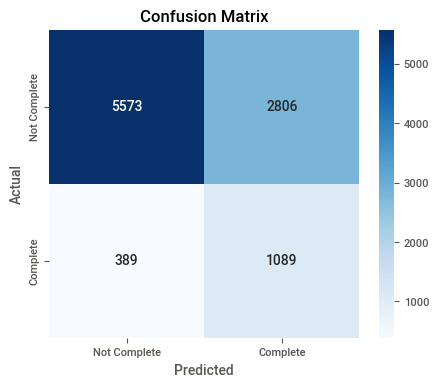

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      8379
           1       0.28      0.74      0.41      1478

    accuracy                           0.68      9857
   macro avg       0.61      0.70      0.59      9857
weighted avg       0.84      0.68      0.72      9857

ROC-AUC Score: 0.761


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = xgb_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Complete", "Complete"], yticklabels=["Not Complete", "Complete"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Optional: Classification report
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1]):.3f}")

## cross validation

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Feature and target
X = df[['purchase_lead', 'route', 'booking_origin', 'length_of_stay', 
        'flight_hour', 'flight_duration', 'wants_extra_baggage', 'trip_type']]
y = df['booking_complete']

# Calculate class weight
from collections import Counter
class_counts = Counter(y)
scale_pos_weight = class_counts[0] / class_counts[1]

# Categorical & numerical columns
categorical_cols = ['route', 'booking_origin', 'trip_type']
numerical_cols = ['purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration', 'wants_extra_baggage']

# Preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Full pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Custom scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(clf_pipeline, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Show average scores
print("\nCross-Validation Results (5-Fold):")
for metric in scoring.keys():
    print(f"{metric.capitalize():<10}: {results['test_' + metric].mean():.4f}")

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



Cross-Validation Results (5-Fold):
Accuracy  : 0.6676
F1        : 0.4121
Precision : 0.2805
Recall    : 0.7768
Roc_auc   : 0.7693


# How each variable contributes to the model’s predictive power

<Figure size 1000x600 with 0 Axes>

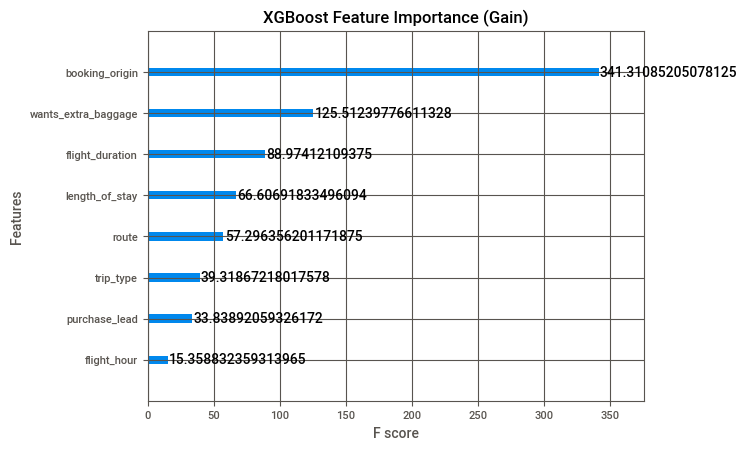

In [76]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_clf, importance_type='gain', max_num_features=20)
plt.title('XGBoost Feature Importance (Gain)')
plt.show()